<a href="https://colab.research.google.com/github/HarshAmin782/YbiInternship/blob/main/Servo_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title of the Project:
# Servo Prediction

Objective:
We will utilize both linear regression and k-nearest neighbour(knn) techniques to predict the outcome of the servo. By applying these machine learning techniques, we aim to determine the best approach for accurately predicting the servo's behavior based on the given input features. This will involve training the linear regression and SVM models on a dataset containing relevant input features and corresponding target variables. Subsequently, we will compare the predictions of both models using evaluation metrics such as mean squared error (MSE), mean absolute error (MAE), or coefficient of determination (R-squared) to assess their performance.

Data Source:
https://github.com/YBIFoundation/Dataset

# Import Library

In [1]:
import pandas as pd

In [3]:
import numpy as np

# Import Data

In [4]:
df = pd.read_csv("https://github.com/YBIFoundation/Dataset/raw/main/Servo%20Mechanism.csv")

# Describe Data

In [5]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


In [7]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


In [13]:
df.shape

(167, 5)

In [8]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

# Data Preprocessing

In [9]:
df[["Motor"]].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
dtype: int64

In [10]:
df[["Screw"]].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
dtype: int64

In [11]:
df.replace({'Motor': {'A':0,'B':1,'C':2,'D':3,'E':4}}, inplace = True)

In [12]:
df.replace({'Screw': {'A':0,'B':1,'C':2,'D':3,'E':4}}, inplace = True)

# Define Target Variable (y) and Feature Variables (X)

In [14]:
X = df[['Motor','Screw','Pgain','Vgain']]

In [15]:
X.shape

(167, 4)

In [16]:
y = df['Class']

In [17]:
y.shape

(167,)

# Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.7,random_state=2529)

# Modeling

In [38]:
#For linear regression
from sklearn.linear_model import LinearRegression

#For knn
from sklearn.neighbors import KNeighborsRegressor

In [39]:
#For linear regression
lr = LinearRegression()

#For knn
knn = KNeighborsRegressor()

In [41]:
#For linear regression
lr.fit(X_train,y_train)

LinearRegression()

In [42]:
#For knn
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [45]:
#For linear regression
y_pred_lr = lr.predict(X_test)

In [46]:
#For knn
y_pred_knn = knn.predict(X_test)

In [47]:
y_pred_lr

array([ 24.89015109,  28.08391972,  17.55257369,  19.57157488,
        37.1210723 ,  23.02101376,  11.31490029,  17.33873833,
        38.79851087,  39.51501737,  12.99233887,  22.61547965,
        15.87513511,  11.6564629 ,  19.26060249,  16.93320422,
        -4.46259683,  29.92246682,  31.59990539,  -3.35180088,
        30.72229038,  30.8833989 ,  32.80526306,  27.12298763,
        14.53925915,   6.09088581,  27.33682299,  14.70036767,
        21.65454756,   3.45251515,  29.01426157,  22.77658817,
        34.23827605,  28.80042621,   8.30158575,   3.20808956,
        17.8941363 ,  29.76135829,  12.61739498,  36.16014022,
        27.52852175,  19.01617691,   7.34065367,   5.66321509,
        30.1668924 ,  28.24502824,  32.56083747,   4.16902164,
        20.69361548,  18.05524482,  24.45402675,   7.58507925,
        22.58488942,  33.11623545,  15.25576564,   0.5697189 ,
        36.87664671,   0.81414449,  16.21669772,  -1.82422617,
        22.06008168,  30.47786479,  23.52368489,  24.48

In [48]:
y_pred_knn

array([21.6, 22.8, 14.4, 23.6, 23.2,  8. , 11.4, 26. , 19.2, 28.2, 10.2,
       13. , 11.8, 12.4, 21. , 23.6,  7.2, 20.8, 14.6, 17. , 29.6, 34. ,
       32.8, 30.4, 14. , 11.8, 12.8, 14.8, 26.6, 10.2, 20.2, 20.4, 18. ,
       19.2, 20.2,  9.8, 29.4, 26.4, 19.8, 29.8, 22. , 20.6, 15.2, 15.2,
       25.6, 21.6, 23.4, 10. , 19.8,  9.8, 18.8, 21.4, 21.2, 28.2, 20.6,
        9.8, 29. ,  8.2, 19.2,  7.2, 14.2, 15.2, 11.2, 21. , 29.4, 18.2,
       23.2, 12.4, 14.8, 24.2, 10.6, 25.6, 12.4, 23.8, 31. , 17.6, 10.8,
       17.8, 18.4, 31. , 13.6, 32.2, 19.6,  8. , 17.6, 27.4, 16. , 11. ,
       13. , 11.8, 32. , 14.6, 25.4,  7.2, 18. , 12.6, 21.8, 16.4, 20.2,
       17.2, 14. , 10.4, 32.6, 12.4, 11.4, 14.2, 19.6, 22.4, 14.6, 10.8,
       21.6, 13.6, 15.2, 32. , 17.2,  9. , 27.4])

# Model Evaluation

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [56]:
#For linear regression
mean_squared_error(y_pred_lr,y_test)

73.57022323365531

In [62]:
#For knn
mean_squared_error(y_pred_knn,y_test)

152.61059829059826

In [58]:
#For linear regression
mean_absolute_error(y_pred_lr,y_test)

7.158141394974153

In [63]:
#For knn
mean_absolute_error(y_pred_knn,y_test)

9.56923076923077

In [60]:
#For linear regression
r2_score(y_pred_lr,y_test)

0.41408445535360383

In [64]:
#For knn
r2_score(y_pred_knn,y_test)

-2.1679328572825405

# Visualization

In [73]:
import matplotlib.pyplot as plt

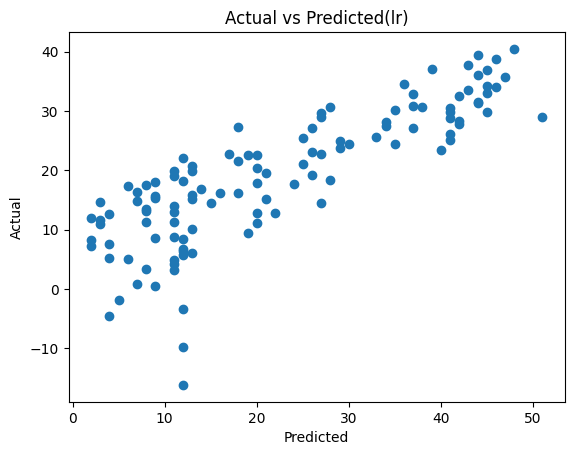

In [78]:
#For linear regression
plt.scatter(y_test,y_pred_lr)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Actual vs Predicted(lr)")
plt.show()

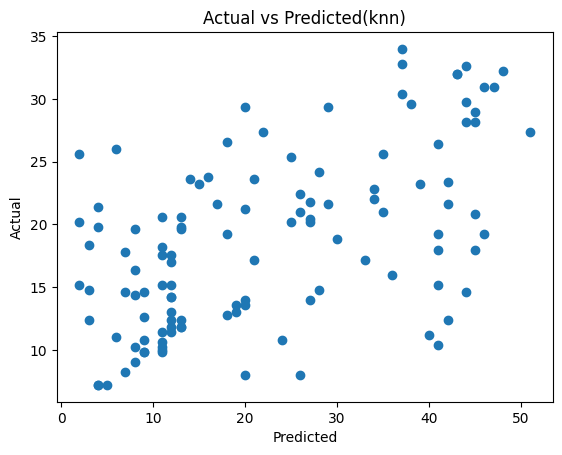

In [79]:
#For knn
plt.scatter(y_test,y_pred_knn)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Actual vs Predicted(knn)")
plt.show()

# Prediction

In [66]:
X_new = df.sample(1)
X_new

,Motor,Screw,Pgain,Vgain,Class
51,2,1,3,2,44


In [68]:
X_new = X_new.drop('Class', axis=1)

In [69]:
X_new.shape

(1, 4)

In [71]:
y_pred_new_lr = lr.predict(X_new)
y_pred_new_lr

array([36.16014022])

In [72]:
y_pred_new_knn = knn.predict(X_new)
y_pred_new_knn

array([29.8])

Explaination:

Linear regression has lower MSE and MAE, indicating better predictive performance with less error compared to KNN.
Linear regression also has a higher R-squared score, suggesting that it explains more of the variance in the servo outcomes compared to KNN.
These findings suggest that linear regression is performing better in this particular scenario for predicting the servo outcome.It's worth noting that  linear regression predicts a higher outcome compared to KNN.